# Null values

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('Ames_outliers_removed.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [59]:
df.drop('PID', axis=1, inplace=True)
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [60]:
# finding null values
# number of null values in each column
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [61]:
# number of rows
len(df)

2927

In [62]:
 # how much percentage of our column is null value?
def missing_percent(df):
    percent_null = df.isnull().sum() / len(df) * 100
    percent_null = percent_null[percent_null > 0].sort_values(ascending=False)
    return percent_null
percent_nan = missing_percent(df)
percent_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
Garage Area        0.034165
Garage Cars        0.034165
dtype: float64

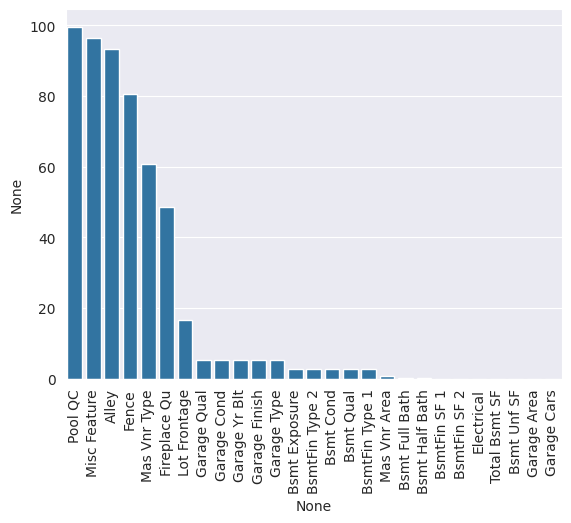

In [63]:
# plotting columns with the most null values
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.show()

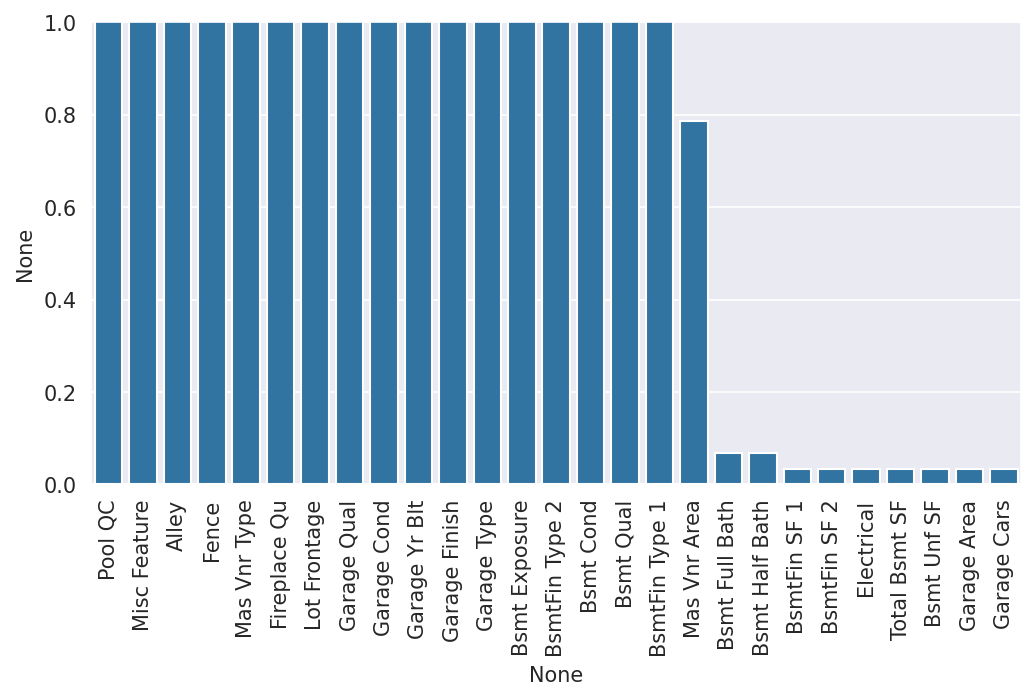

In [64]:
plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 1) # limiting y to see columns that have under 1% missing values
plt.show()

In [65]:
percent_nan[percent_nan < 1] # columns that have less than 1% missing values

Mas Vnr Area      0.785787
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Area       0.034165
Garage Cars       0.034165
dtype: float64

In [66]:
df['Garage Cars'].isnull().sum()

np.int64(1)

In [67]:
1 / len(df) * 100 # if we had one missing value the percentage would be 0.0341646737273659
# this means some column(4 onward) have only 1 missing values

0.0341646737273659

In [68]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [69]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [70]:
# dropping rows that have null values in 'Electrical' or 'Garage Area' columns
# if we don't define subset, each row that has even one NaN would be deleted
print(df.shape)
df.dropna(axis=0, subset=['Electrical', 'Garage Area'], inplace=True)
df.shape

(2927, 80)


(2925, 80)

In [71]:
percent_nan2 = missing_percent(df)

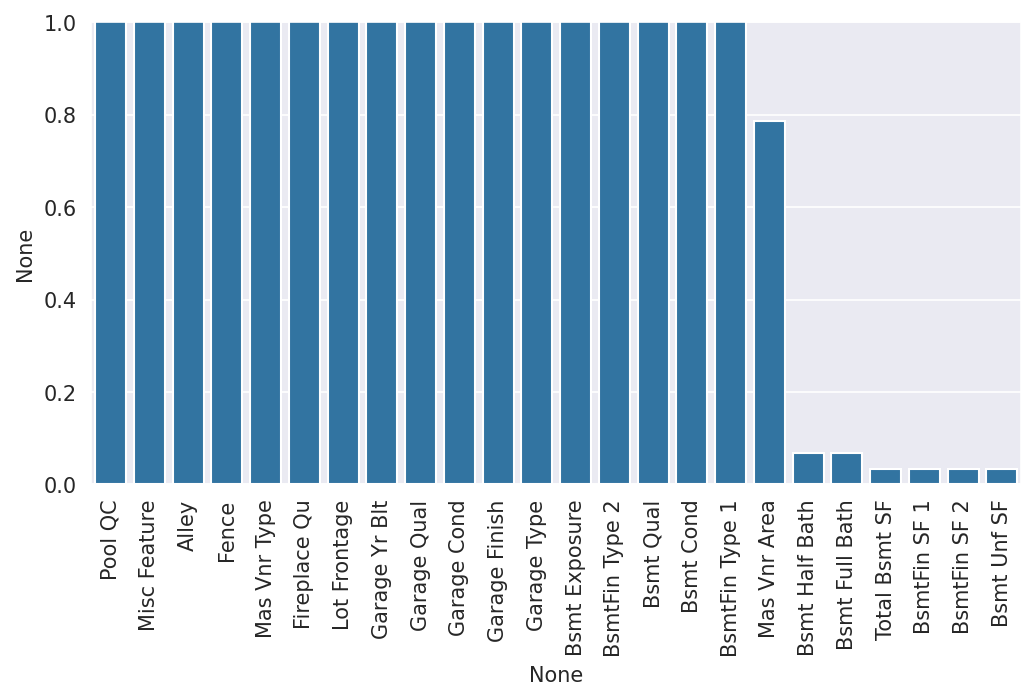

In [72]:
plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(x=percent_nan2.index, y=percent_nan2)
plt.xticks(rotation=90)
plt.ylim(0, 1) # limiting y to see columns that have under 1% missing values
plt.show()

In [73]:
percent_nan2[percent_nan2 < 1] # columns that have less than 1% missing values
# why didn't we delete other rows with on NaN?
# if we look at the columns names it is apparent that all of them are related to basement(Bsmt)
# let's check this

Mas Vnr Area      0.786325
Bsmt Half Bath    0.068376
Bsmt Full Bath    0.068376
Total Bsmt SF     0.034188
BsmtFin SF 1      0.034188
BsmtFin SF 2      0.034188
Bsmt Unf SF       0.034188
dtype: float64

In [74]:
# as can be seen, they're all one row with index 1341
print(df[df['Bsmt Unf SF'].isnull()].index)
print(df[df['BsmtFin SF 1'].isnull()].index)
print(df[df['BsmtFin SF 2'].isnull()].index)
print(df[df['Total Bsmt SF'].isnull()].index)
print(df[df['Bsmt Full Bath'].isnull()].index)
print(df[df['Bsmt Half Bath'].isnull()].index)

Index([1341], dtype='int64')
Index([1341], dtype='int64')
Index([1341], dtype='int64')
Index([1341], dtype='int64')
Index([1341, 1497], dtype='int64')
Index([1341, 1497], dtype='int64')


In [75]:
# in the dataset metadata it says they had put NaN values for houses that don't have basement(NA No Basement)
# hence we can change this NaN value with another value
# for numeric columns we would put 0 and for string column we would put 'Nadarad'
with open('Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [76]:
# BSMT Numeric Columns
bsmt_num_cols = ['Bsmt Unf SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 2', 'BsmtFin SF 1', 'Total Bsmt SF']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# BSMT String Columns
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('Nadarad')

In [77]:
# df.columns

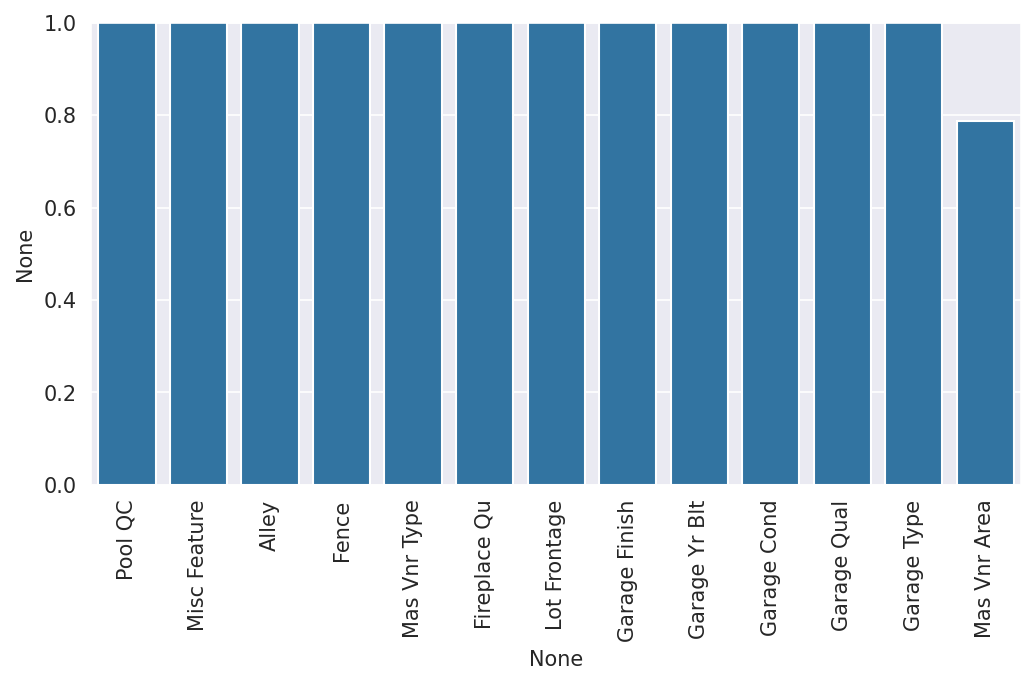

In [78]:
percent_nan3 = missing_percent(df)
plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(x=percent_nan3.index, y=percent_nan3)
plt.xticks(rotation=90)
plt.ylim(0, 1)  # limiting y to see columns that have under 1% missing values
plt.show()

In [79]:
# as can be seen Only Mass Vnr Area remains
percent_nan3[percent_nan3 < 1]

Mas Vnr Area    0.786325
dtype: float64

In [80]:
# we found out from metadata that 'Mas Vnr Type' is str and 'Mas Vnr Area' is numeric
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('Nadarad')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

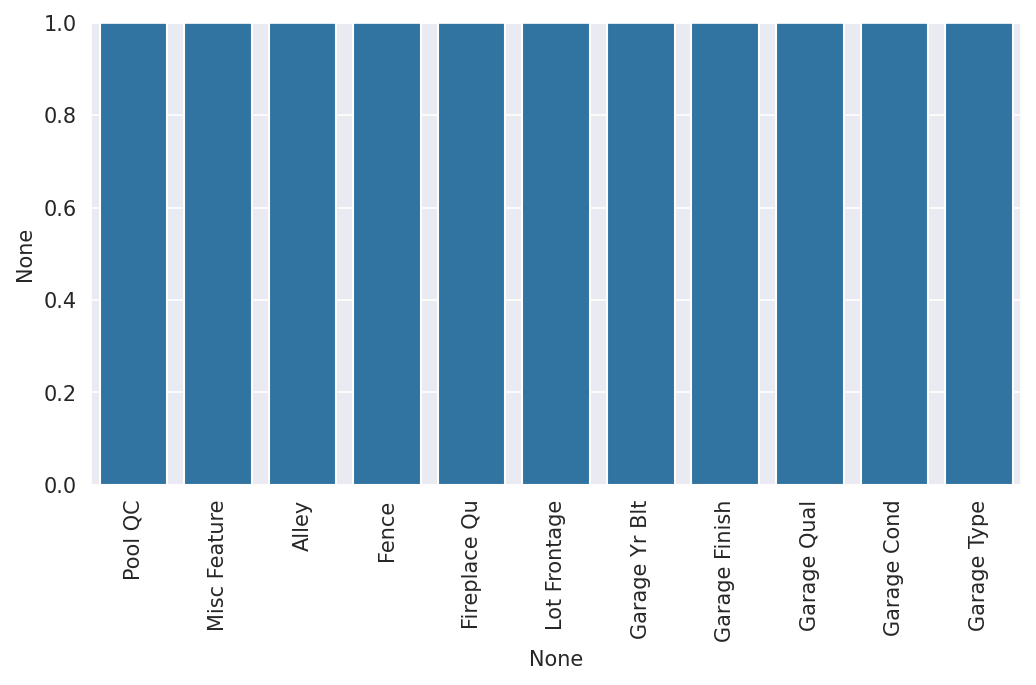

In [81]:
# there are no columns with <1% missing values anymore
percent_nan3 = missing_percent(df)
plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(x=percent_nan3.index, y=percent_nan3)
plt.xticks(rotation=90)
plt.ylim(0, 1)  # limiting y to see columns that have under 1% missing values
plt.show()

In [82]:
missing_percent(df)

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Garage Type       5.367521
dtype: float64

In [83]:
# these columns are related to garages and houses that don't have garage, have null values in those columns
# so we would fill those columns with null value
gar_str_cols = ['Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type']
df[gar_str_cols] = df[gar_str_cols].fillna('Nadarad')

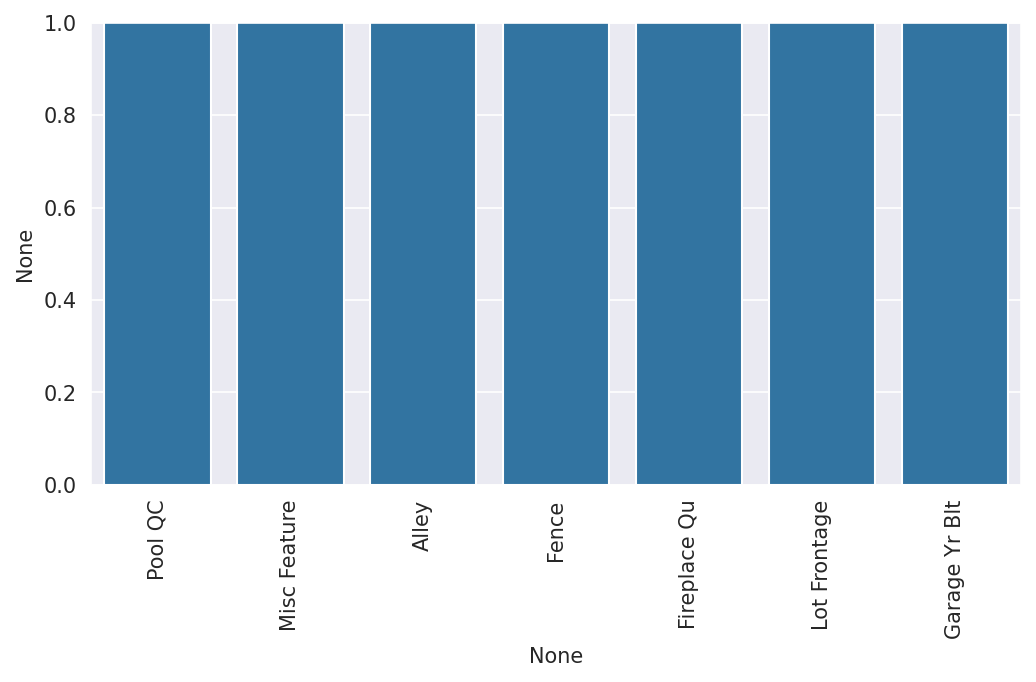

In [84]:
# there are no columns with <1% missing values anymore
percent_nan4 = missing_percent(df)
plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(x=percent_nan4.index, y=percent_nan4)
plt.xticks(rotation=90)
plt.ylim(0, 1)  # limiting y to see columns that have under 1% missing values
plt.show()

In [85]:
# Garage Year built(Garage Yr Blt)
# houses than don't have garages have null value instead
# we must fill those nulls with sth
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0) # if there is no garage there is no year for it

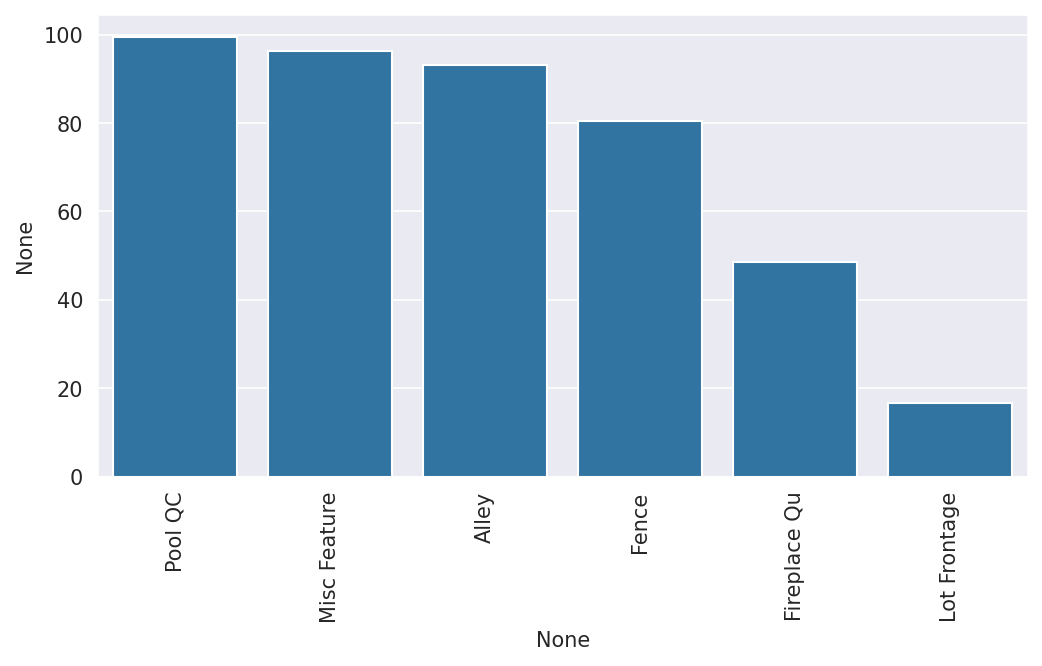

In [86]:
percent_nan4 = missing_percent(df)
plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(x=percent_nan4.index, y=percent_nan4)
plt.xticks(rotation=90)
plt.show()

In [87]:
missing_percent(df)

Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

In [88]:
# there are 4 columns that have more than 80% missing values so we must delete them
df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1, inplace=True)

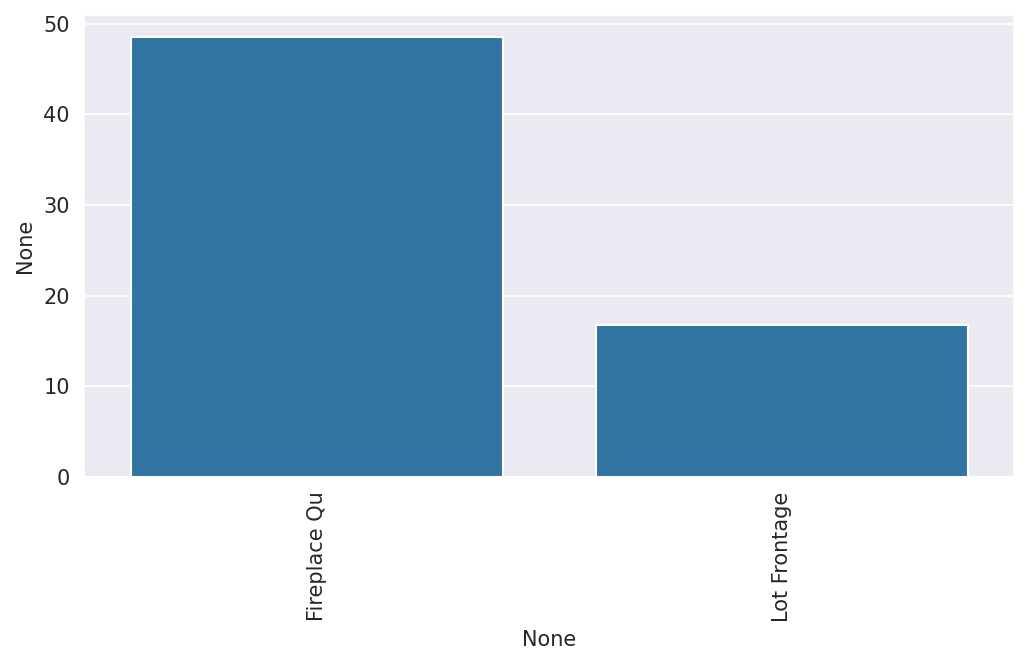

In [89]:
percent_nan4 = missing_percent(df)
plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(x=percent_nan4.index, y=percent_nan4)
plt.xticks(rotation=90)
plt.show()

In [90]:
missing_percent(df)

Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

In [91]:
# from metadata we found out that houses that don't have fireplaces have null values in 'Fireplace Qu' column
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('Nadarad')

In [92]:
missing_percent(df)

Lot Frontage    16.752137
dtype: float64

In [93]:
# LotFrontage: Linear feet of street connected to property
df['Lot Frontage']

# there is a column in our df named neighborhood(names of the neighborhood)
# neighborhood's houses usually is built in the same way
# so we must groupby our df with that

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

In [94]:
df['Neighborhood']

0         NAmes
1         NAmes
2         NAmes
3         NAmes
4       Gilbert
         ...   
2922    Mitchel
2923    Mitchel
2924    Mitchel
2925    Mitchel
2926    Mitchel
Name: Neighborhood, Length: 2925, dtype: object

In [95]:
a = df.groupby('Neighborhood')['Lot Frontage'] # groupbying by 'Neighborhood' column and storing only 'Lot Frontage' column as values
a.get_group('Blmngtn')

52      43.0
53      43.0
468     53.0
469     51.0
470     43.0
471     43.0
472     43.0
473     43.0
1080     NaN
1081     NaN
1082    43.0
1083    43.0
1084    53.0
1740    53.0
1741    53.0
1742     NaN
1743    53.0
2416    43.0
2417     NaN
2418     NaN
2419     NaN
2420     NaN
2421     NaN
2422    43.0
2423    43.0
2424    43.0
2425    53.0
2426    53.0
Name: Lot Frontage, dtype: float64

In [96]:
df.groupby('Neighborhood')['Lot Frontage'].mean()
# e.g. Blmngtn neighborhood has a mean 'Lot Frontage' of  46.9
# we would fill every neighborhood 'Lot Frontage' null values with the mean of that neighborhood 'Lot Frontage'

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [97]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

In [98]:
df2 = pd.DataFrame({'key': ['a', 'a', 'b', 'b'], 'value': [1, 2, 3, 4]})
df2.head()

,key,value
0,a,1
1,a,2
2,b,3
3,b,4


In [99]:
a = df2.groupby('key')
a.get_group('b')

,key,value
2,b,3
3,b,4


# transform gives all the rows by their indexes but apply gives the groups

In [100]:
slm = df2.groupby('key')['value'].apply(lambda x: x.mean())
slm

key
a    1.5
b    3.5
Name: value, dtype: float64

In [101]:
result = df2.groupby('key')['value'].transform(lambda x: x.mean())
result

0    1.5
1    1.5
2    3.5
3    3.5
Name: value, dtype: float64

In [102]:
# some neighborhood's mean are NaN
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [103]:
# after groupbying look at column 'Lot Frontage' if there is null values put the mean of that group in its stead
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [104]:
# df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].apply(lambda value: value.fillna(value.mean()))

In [105]:
# we still have 3 nulls.
# that's because some neighborhood's mean were NaN

In [106]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [107]:
# there is no NaN value anymore
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [108]:
df.to_csv('no_outlier_Ames_outliers_removed.csv', index=False)